In [70]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics, svm
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, f1_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load the training and testing datasets
train_data= pd.read_csv('train.csv')
test_data= pd.read_csv('test.csv')

In [3]:
# Display the first few rows of the training and testing datasets
train_data.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
# Display the index, information, data types, and descriptive statistics of the training dataset
train_data.index
train_data.info()
train_data.dtypes
train_data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
# Display the index, information, data types, and descriptive statistics of the testing dataset
test_data.index
test_data.info()
test_data.dtypes
test_data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB


,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


<Axes: >

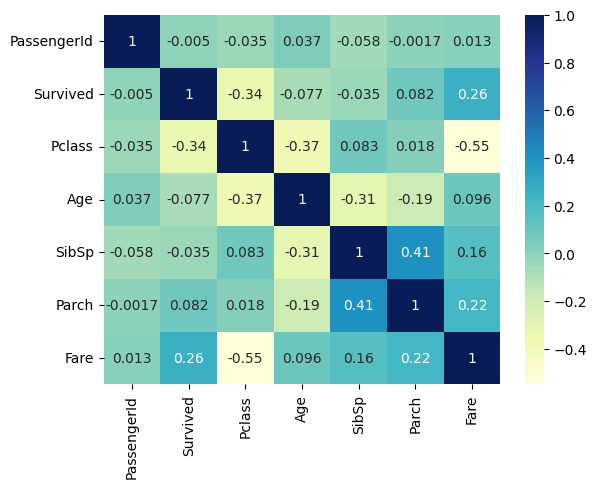

In [11]:
# Print the correlation matrix and visualize it using a heatmap
corr_matrix = train_data.corr(numeric_only=True)
plt.figure()
sns.heatmap(corr_matrix,annot=True, cmap='YlGnBu')

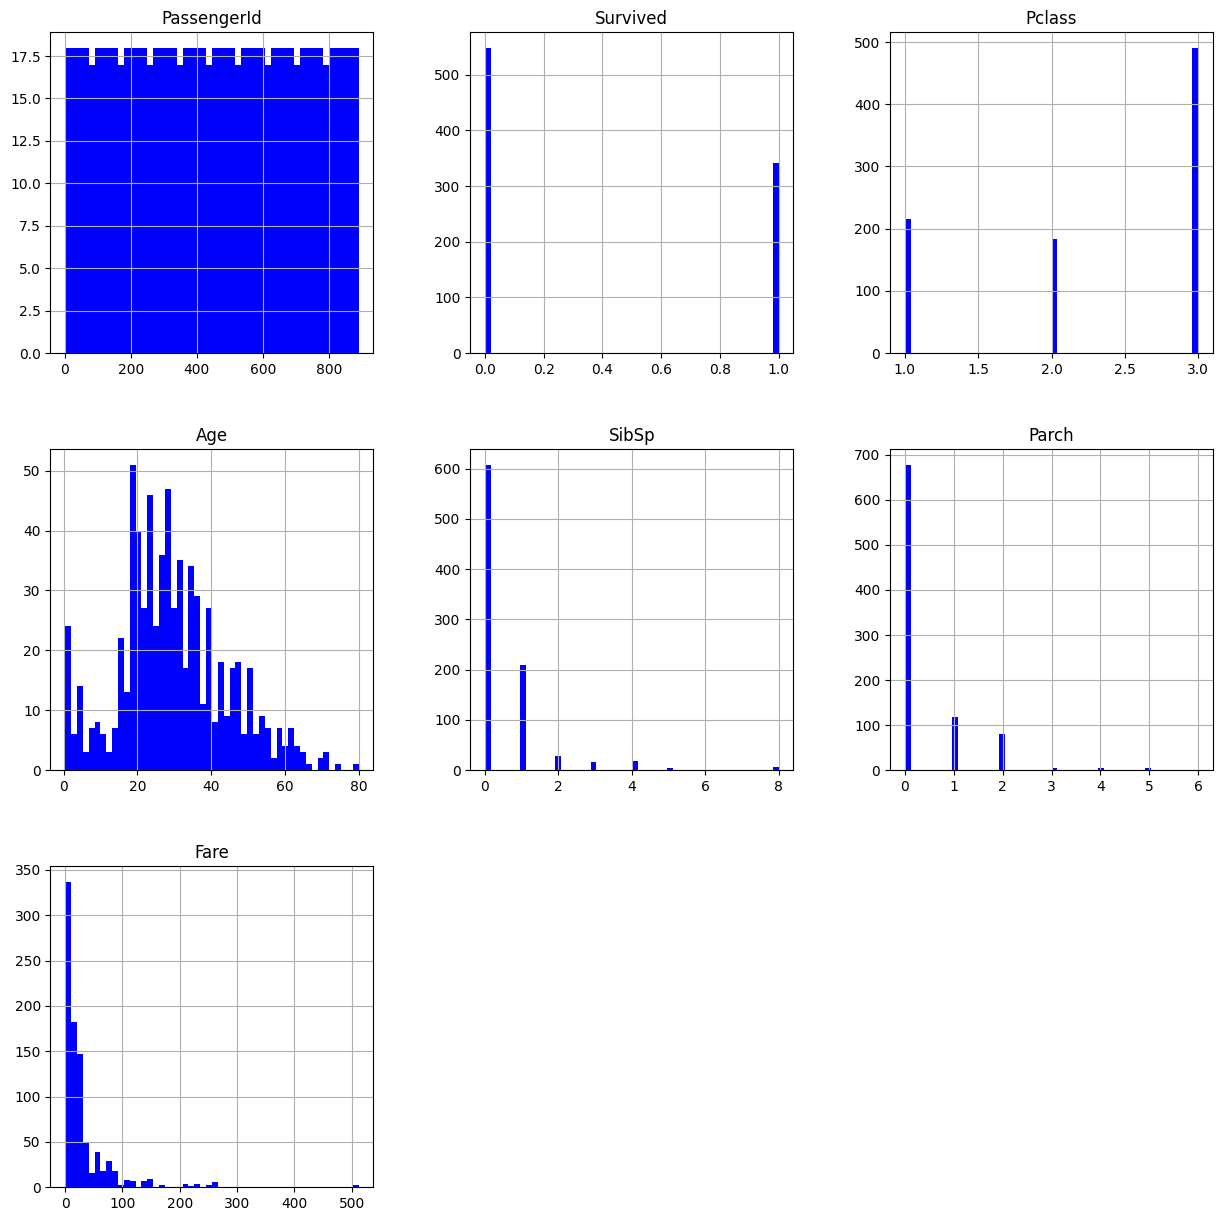

In [12]:
train_data.hist(bins=50, figsize=(15,15), color= 'Blue',)
plt.show()

<Axes: xlabel='Survived', ylabel='count'>

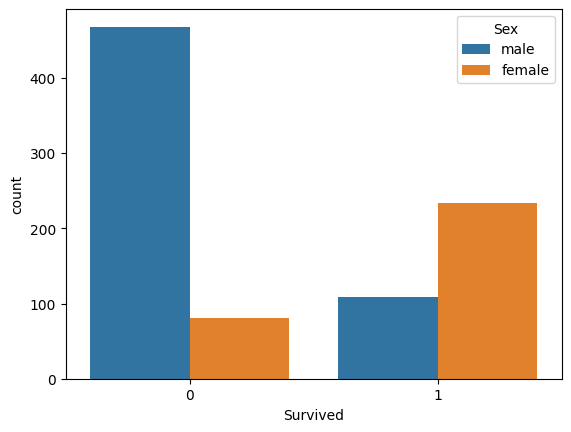

In [7]:
# Plot the count of survivors by sex and the survival rate by passenger class
sns.countplot(x='Survived',data=train_data,hue='Sex')


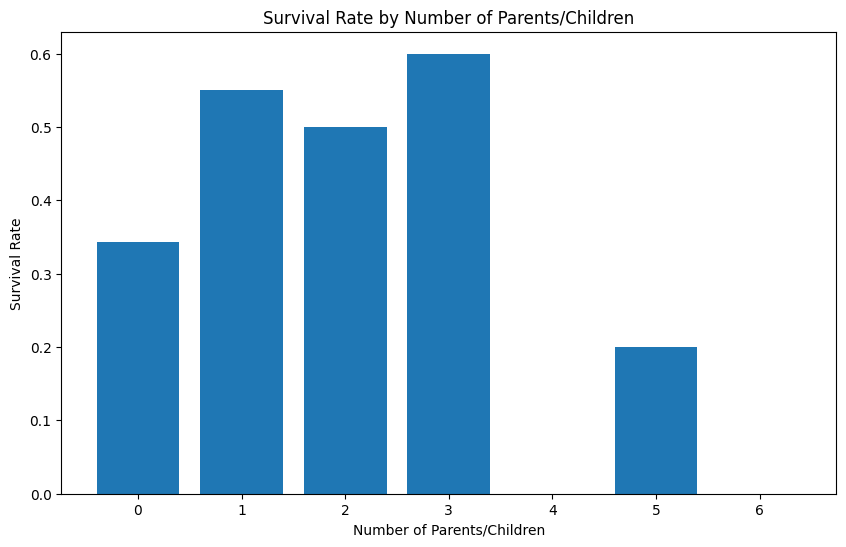

In [8]:
# Group the data by 'Parch' and calculate the mean survival rate for each group
survival_rate_by_parch = train_data.groupby('Parch')['Survived'].mean()

# Create a bar plot
plt.figure(figsize=(10, 6))
plt.bar(survival_rate_by_parch.index, survival_rate_by_parch.values)

plt.xlabel('Number of Parents/Children')
plt.ylabel('Survival Rate')
plt.title('Survival Rate by Number of Parents/Children')
plt.show()

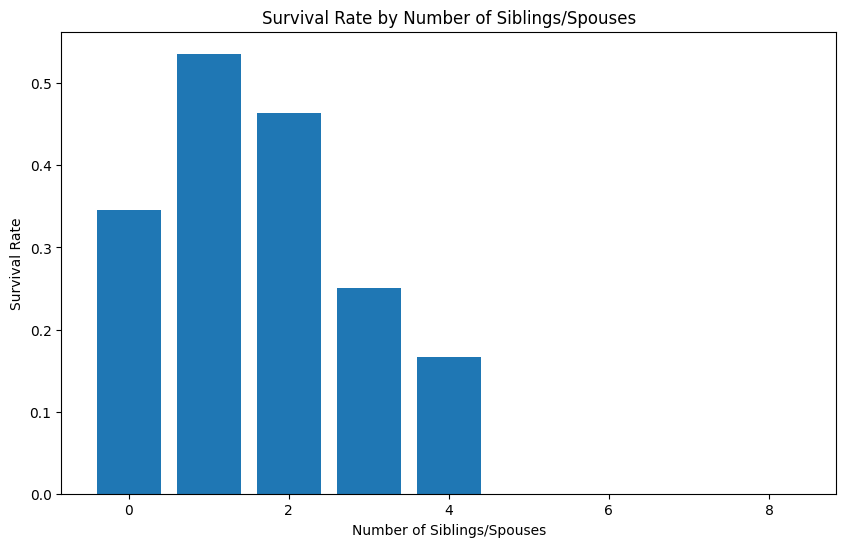

In [9]:
# Group the data by 'SibSp' and calculate the mean survival rate for each group
survival_rate_by_SibSp = train_data.groupby('SibSp')['Survived'].mean()

# Create a bar plot
plt.figure(figsize=(10, 6))
plt.bar(survival_rate_by_SibSp.index, survival_rate_by_SibSp.values)

plt.xlabel('Number of Siblings/Spouses')
plt.ylabel('Survival Rate')
plt.title('Survival Rate by Number of Siblings/Spouses')
plt.show()

<Axes: xlabel='Pclass', ylabel='Survived'>

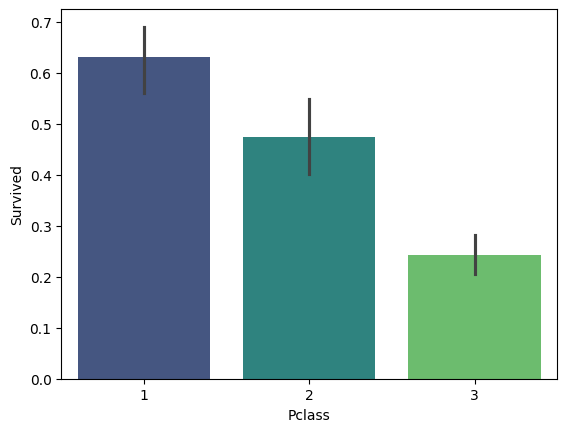

In [10]:
#Plot the count of survival rate by passenger class
sns.barplot(x='Pclass',y='Survived',data=train_data,palette='viridis')

In [13]:
# Display the number of missing values in each column
train_data.isnull().sum()


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [14]:
# Display the number of missing values in each column
train_data.isnull().sum()


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<Axes: >

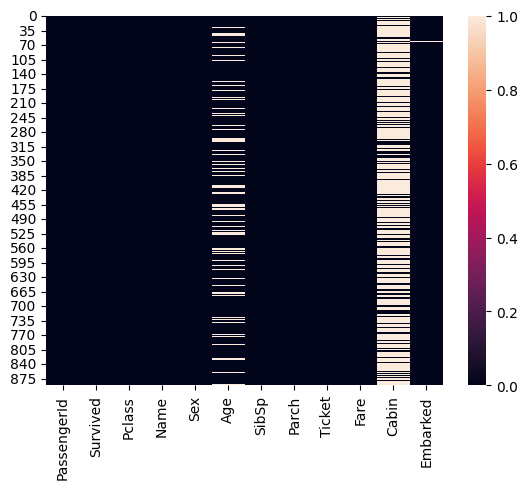

In [15]:
# Visualize this using a heatmap
sns.heatmap(train_data.isnull())

In [16]:
# Calculate and display the percentage of missing values in the 'Age' column
train_data['Age'].isnull().sum()/len(train_data)*100


19.865319865319865

In [17]:
# Calculate and display the percentage of missing values in the 'Cabin' column
train_data['Cabin'].isnull().sum()/len(train_data)*100

77.10437710437711

<Axes: xlabel='Pclass', ylabel='Age'>

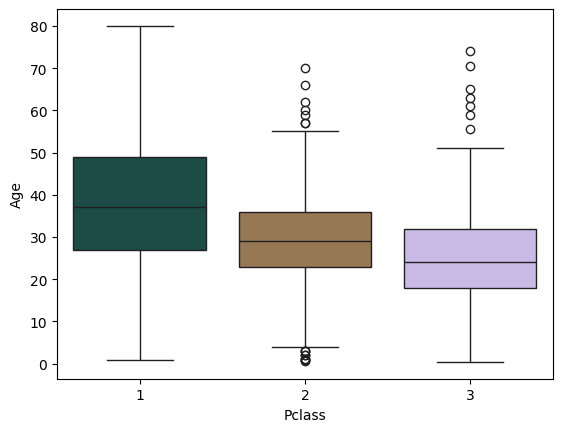

In [18]:
# Plot a boxplot of age by passenger class
plt.figure()
sns.boxplot(x='Pclass',y='Age',data=train_data, palette='cubehelix')

In [19]:
# Define a function to impute missing age values based on passenger class in train dataset
def impute_age(row):
    if pd.isnull(row['Age']):
        return int(train_data[train_data['Pclass'] == row['Pclass']]['Age'].mean())
    else:
        return row['Age']

In [20]:
# Define a function to impute missing age values based on passenger class in test dataset
def impute_age(row):
    if pd.isnull(row['Age']):
        return int(test_data[test_data['Pclass'] == row['Pclass']]['Age'].mean())
    else:
        return row['Age']

In [21]:
# Apply the function to the 'Age' column
train_data['Age'] = train_data.apply(impute_age, axis=1)
test_data['Age'] = test_data.apply(impute_age, axis=1)

In [24]:
# Find the most common value in the 'Embarked' column
most_common_train = train_data['Embarked'].mode()[0]
most_common_test = test_data['Embarked'].mode()[0]

In [25]:
# Fill missing values in the 'Embarked' column with the most common value
train_data['Embarked'].fillna(most_common_train,inplace=True)
test_data['Embarked'].fillna(most_common_test,inplace=True)

In [26]:
# Check the number of missing values in the 'Age' and 'Embarked' columns
train_data[['Age','Embarked']].isnull().sum()

Age         0
Embarked    0
dtype: int64

In [22]:
# Calculate the mean fare for Pclass 3 in test data
mean_fare_pclass3 = test_data[test_data['Pclass'] == 3]['Fare'].mean()

# Define a function to impute fare for Pclass 3
def impute_fare(row):
    if pd.isnull(row['Fare']) and row['Pclass'] == 3:
        return mean_fare_pclass3
    else:
        return row['Fare']

# Apply the function to the fare column
test_data['Fare'] = test_data.apply(impute_fare, axis=1)

In [23]:
# Select the rows where 'fare' is NaN in test dataset
nan_fare_rows = test_data[test_data['Fare'].isna()]

# Print the selected rows
print(nan_fare_rows)

Empty DataFrame
Columns: [PassengerId, Pclass, Name, Sex, Age, SibSp, Parch, Ticket, Fare, Cabin, Embarked]
Index: []


In [27]:
test_data[['Age','Embarked']].isnull().sum()

Age         0
Embarked    0
dtype: int64

In [28]:
# Create dummy variables for the 'Sex','Embarked' and 'Pclass' columns for Train data
Gender=pd.get_dummies(train_data['Sex'],dtype='int64',drop_first=True)
Embarked =pd.get_dummies(train_data['Embarked'],dtype='int64', drop_first=True) 
Pclass = pd.get_dummies(train_data['Pclass'],dtype='int64', drop_first=True) 

In [29]:
# Create dummy variables for the 'Sex','Embarked' and 'Pclass' columns for Test data
Gender_test=pd.get_dummies(test_data['Sex'],dtype='int64',drop_first=True)
Embarked_test=pd.get_dummies(test_data['Embarked'],dtype='int64', drop_first=True) 
Pclass_test= pd.get_dummies(test_data['Pclass'],dtype='int64', drop_first=True) 

In [30]:
# Concatenate the dummy variables to the dataset
train_data = pd.concat([train_data,Gender, Embarked, Pclass], axis=1)
test_data = pd.concat([test_data,Gender_test, Embarked_test, Pclass_test], axis=1)

In [31]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,male,Q,S,2,3
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,0,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0,0,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,0,1,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0,0,1,0,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1,0,1,0,1


In [32]:
# Display the column names
train_data.columns


Index(['PassengerId',    'Survived',      'Pclass',        'Name',
               'Sex',         'Age',       'SibSp',       'Parch',
            'Ticket',        'Fare',       'Cabin',    'Embarked',
              'male',           'Q',           'S',             2,
                   3],
      dtype='object')

In [35]:
# Display the column names
test_data.columns

Index(['PassengerId', 'Age', 'SibSp', 'Parch', 'Fare', 'male', 'Q', 'S', 2, 3], dtype='object')

In [34]:
# Drop the 'Name', 'Sex', 'Ticket','Embarked' and 'Pclass' columns
train_data.drop(['Name','Sex','Ticket','Embarked','Pclass','Cabin'],axis=1,inplace=True)
test_data.drop(['Name','Sex','Ticket','Embarked','Pclass','Cabin'],axis=1,inplace=True)

In [36]:
#Rename new columns
train_data=train_data.rename(columns={'male': 'Sex', 2: 'Pclass_2', 3: 'Pclass_3'})
test_data=test_data.rename(columns={'male': 'Sex', 2: 'Pclass_2', 3: 'Pclass_3'})

In [45]:
# Create a StandardScaler object
scaler = StandardScaler()

# Fit the scaler to the 'Age' and 'Fare' columns and transform them
train_data[['Age', 'Fare']] = scaler.fit_transform(train_data[['Age', 'Fare']])
test_data[['Age', 'Fare']] = scaler.fit_transform(test_data[['Age', 'Fare']])

In [46]:
train_data.head()

,PassengerId,Survived,Age,SibSp,Parch,Fare,Sex,Q,S,Pclass_2,Pclass_3
0,1,0,-0.537607,1,0,-0.502445,1,0,1,0,1
1,2,1,0.664576,1,0,0.786845,0,0,0,0,0
2,3,1,-0.237061,0,0,-0.488854,0,0,1,0,1
3,4,1,0.439167,1,0,0.420730,0,0,1,0,0
4,5,0,0.439167,0,0,-0.486337,1,0,1,0,1


In [ ]:
test_data.head()

The accuracy of the Logistic Regression model is 81.34%
RMSE: 0.1865671641791045
F1 Score: 0.76


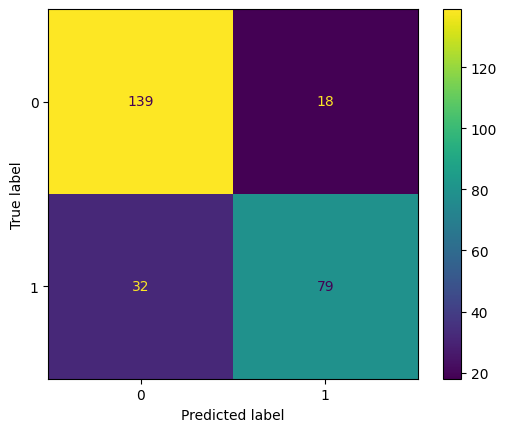

In [85]:
#Linear Regression model
X = train_data.iloc[:, 2:11]
y = train_data.iloc[:, 1]

#Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#Define and fit the model
model = LogisticRegression()
model.fit(X_train, y_train)

#Make predictions
predictions = model.predict(X_test)

#Check metrics
accuracy = accuracy_score(y_test, predictions)
print(f'The accuracy of the Logistic Regression model is {accuracy*100:.2f}%')
print('RMSE:',metrics.mean_squared_error(y_test,predictions))
f1 = f1_score(y_test, predictions)
print(f'F1 Score: {f1:.2f}')

#Print confusion matrix
cm = confusion_matrix(y_test, predictions)
cmd = ConfusionMatrixDisplay(cm, display_labels=model.classes_)
cmd.plot()


The accuracy of the KNN model is 78.36%
RMSE: 0.21641791044776118
F1 Score: 0.73


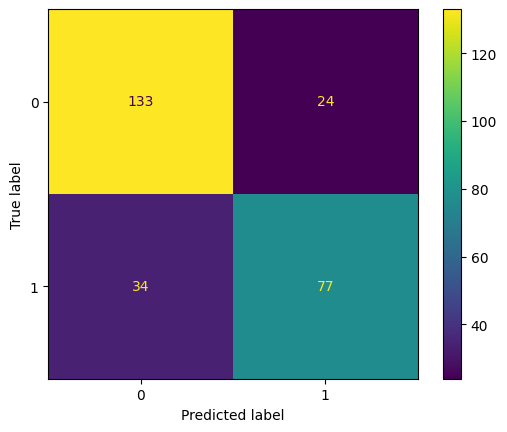

In [60]:
#KNN model
X = train_data.iloc[:, 2:11]
y = train_data.iloc[:, 1]

#Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#Define and fit the model
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train,y_train)

#Make predictions
predictions_knn = knn_model.predict(X_test)

#Check metrics
accuracy = accuracy_score(y_test, predictions_knn)
print(f'The accuracy of the KNN model is {accuracy*100:.2f}%')
print('RMSE:',metrics.mean_squared_error(y_test,predictions_knn))
f1 = f1_score(y_test, predictions_knn)
print(f'F1 Score: {f1:.2f}')

#Print confusion matrix
cm = confusion_matrix(y_test, predictions_knn)
cmd = ConfusionMatrixDisplay(cm, display_labels=knn_model.classes_)
cmd.plot()

The accuracy of the SVM(rbf) model is 81.72%
RMSE: 0.1828358208955224
F1 Score: 0.77


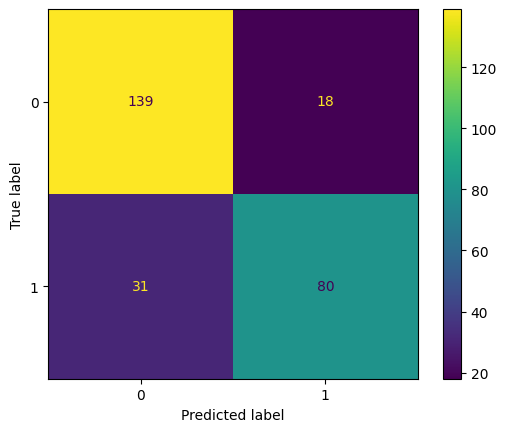

In [78]:
#SVM RBF model
X = train_data.iloc[:, 2:11]
y = train_data.iloc[:, 1]

#Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#Define and fit the model
rbf_model = svm.SVC(kernel='rbf')
rbf_model.fit(X_train,y_train)

#Make predictions
predictions_rbf = rbf_model.predict(X_test)

#Check metrics
accuracy = accuracy_score(y_test, predictions_rbf)
print(f'The accuracy of the SVM(rbf) model is {accuracy*100:.2f}%')
print('RMSE:',metrics.mean_squared_error(y_test,predictions_rbf))
f1 = f1_score(y_test, predictions_rbf)
print(f'F1 Score: {f1:.2f}')

#Print confusion matrix
cm = confusion_matrix(y_test, predictions_rbf)
cmd = ConfusionMatrixDisplay(cm, display_labels=rbf_model.classes_)
cmd.plot()

The accuracy of the Decision Tree (Depth) model is 79.48%
RMSE: 0.20522388059701493
F1 Score: 0.74


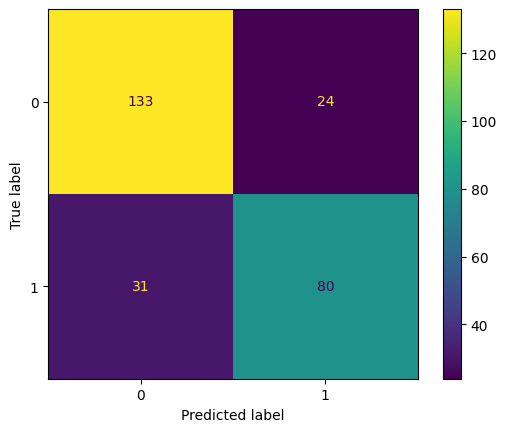

In [81]:
#Decision tree (depth) model
X = train_data.iloc[:, 2:11]
y = train_data.iloc[:, 1]

#Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model_dt_depth =DecisionTreeClassifier(max_depth=5)

model_dt_depth.fit(X_train,y_train)

#Make predictions
predictions_DTdepth =model_dt_depth.predict(X_test)

#check metrics
accuracy = accuracy_score(y_test, predictions_DTdepth)
print(f'The accuracy of the Decision Tree (Depth) model is {accuracy*100:.2f}%')
print('RMSE:',metrics.mean_squared_error(y_test,predictions_DTdepth))
f1 = f1_score(y_test, predictions_DTdepth)
print(f'F1 Score: {f1:.2f}')

#Print confusion matrix
cm = confusion_matrix(y_test, predictions_DTdepth)
cmd = ConfusionMatrixDisplay(cm, display_labels=model_dt_depth.classes_)
cmd.plot()

In [ ]:
# Make predicions using test dataset
X_test_data = test_data.iloc[:, 1:11]

# Use the trained model to make predictions
test_predictions = model.predict(X_test_data)

# predicted target values for test dataset
print(test_predictions)

In [ ]:
# Create a DataFrame from the predictions
predictions_df = pd.DataFrame(test_predictions, columns=['Survived'])

# Reset the index of test_data (to ensure the dataframes align correctly)
test_data.reset_index(drop=True, inplace=True)

# Concatenate the original DataFrame with the predictions DataFrame
test_data_with_predictions = pd.concat([test_data, predictions_df], axis=1)
# Get a list of all the column names
cols = list(test_data_with_predictions.columns)

# Remove 'Survived' from its current position
cols.remove('Survived')

# Insert 'Survived' at the second position (index 1)
cols.insert(1, 'Survived')

# Reindex the DataFrame with the new column order
test_data_with_predictions = test_data_with_predictions[cols]

In [ ]:
test_data_with_predictions

In [86]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}

# Create a GridSearchCV object
grid = GridSearchCV(LogisticRegression(), param_grid, cv=5)

# Fit the model to the training data
grid.fit(X_train, y_train)

# Print the best parameters and the best score
print(f'Best parameters: {grid.best_params_}')
print(f'Best score: {grid.best_score_}')

# Use the model with the best parameters to make predictions on the test data
predictions_grid = grid.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, predictions_grid)

print(f'The accuracy of the optimised logistic regression model is {accuracy*100:.2f}%')

Best parameters: {'C': 0.1}
Best score: 0.8169677419354839
The accuracy of the optimized logistic regression model is 80.60%
